Задача: создать классификатор покемонов по двум типам (Type 1, Type 2). 

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection

2023-06-14 09:12:24.701459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
pok = pd.read_csv("/Users/karantovanatolij/Documents/Uni/Golubov/pok.csv")
pok.head()
pok.dropna()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [10]:
pok = pok.drop(['Name','#','Generation', 'Legendary'], axis = 1) #Deleting categorical features

In [11]:
pok.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass,Poison,318,45,49,49,65,65,45
1,Grass,Poison,405,60,62,63,80,80,60
2,Grass,Poison,525,80,82,83,100,100,80
3,Grass,Poison,625,80,100,123,122,120,80
4,Fire,NaN,309,39,52,43,60,50,65


In [12]:
pok = pok.sort_values(by = ['Type 1', 'Type 2'], ignore_index=True)

In [13]:
display(pok)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bug,Electric,319,50,47,50,57,50,65
1,Bug,Electric,472,70,77,60,97,60,108
2,Bug,Fighting,500,80,125,75,40,95,85
3,Bug,Fighting,600,80,185,115,40,105,75
4,Bug,Fire,360,55,85,55,50,55,60
...,...,...,...,...,...,...,...,...,...
795,Water,NaN,470,165,75,80,40,45,65
796,Water,NaN,314,41,56,40,62,44,71
797,Water,NaN,405,54,63,52,83,56,97
798,Water,NaN,330,50,53,62,58,63,44


In [14]:
import matplotlib.pyplot as plt 

# EDA

### Check for count of NaN Type 1

In [15]:
pok['Type 1'].isna().sum()

0

### Check for count NaN Type 2

In [16]:
pok['Type 2'].isna().sum()

386

### Count of pokemons by type 1

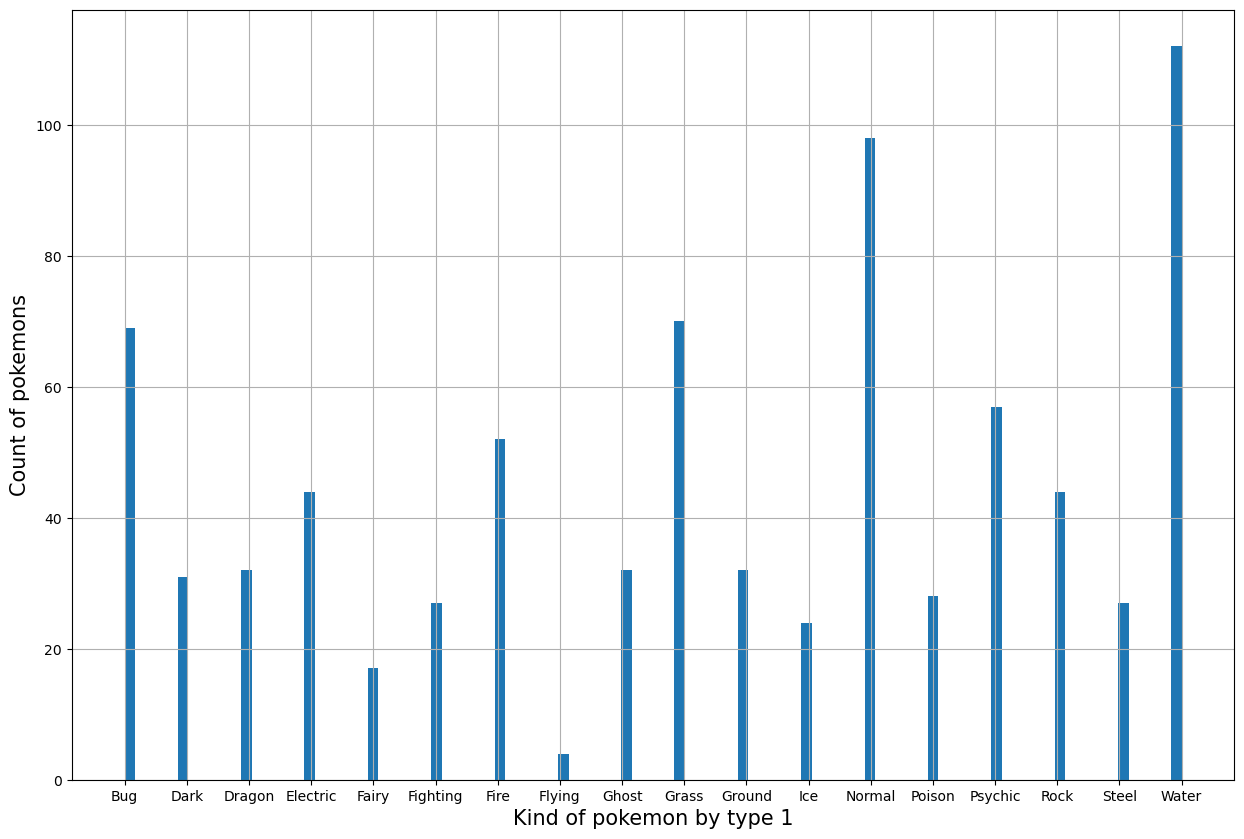

In [17]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
pok['Type 1'].hist(ax = ax, bins = 100)
plt.xlabel("Kind of pokemon by type 1",fontsize = 15)
plt.ylabel("Count of pokemons", fontsize = 15)
plt.show()

### Count of pokemons by type 2

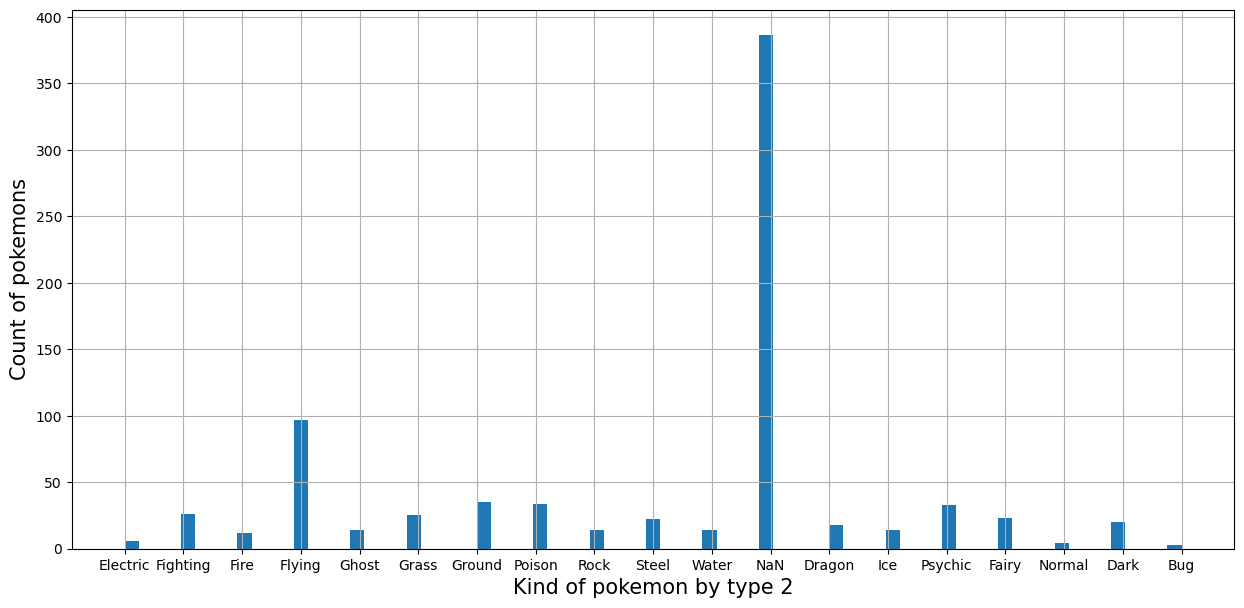

In [18]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
#pok['Type 2'].sort_values().hist(ax = ax, bins = 100)
pok['Type 2'].fillna(value='NaN').hist(ax = ax, bins = 75)
plt.xlabel("Kind of pokemon by type 2",fontsize = 15)
plt.ylabel("Count of pokemons", fontsize = 15)
plt.show()

### Count of features

In [19]:
pok.drop(['Type 1', 'Type 2','Total'], axis = 1).shape[1]

6

# Creating model

## Multi class classification

In [20]:
import category_encoders as ce

In [21]:
pok.head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bug,Electric,319,50,47,50,57,50,65
1,Bug,Electric,472,70,77,60,97,60,108
2,Bug,Fighting,500,80,125,75,40,95,85
3,Bug,Fighting,600,80,185,115,40,105,75
4,Bug,Fire,360,55,85,55,50,55,60
5,Bug,Fire,550,85,60,65,135,105,100
6,Bug,Flying,395,60,45,50,90,80,70
7,Bug,Flying,500,70,110,80,55,80,105
8,Bug,Flying,600,65,155,120,65,90,105
9,Bug,Flying,265,40,20,30,40,80,55


### Partition dataset into features and labels 

In [22]:
features = pok.drop(columns = ['Type 1', 'Type 2', 'Total']) # dataframe of features

In [23]:
features.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,50,47,50,57,50,65
1,70,77,60,97,60,108
2,80,125,75,40,95,85
3,80,185,115,40,105,75
4,55,85,55,50,55,60


In [24]:
labels = pok.drop(columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

In [25]:
labels.head()

,Type 1,Type 2
0,Bug,Electric
1,Bug,Electric
2,Bug,Fighting
3,Bug,Fighting
4,Bug,Fire


### Encode categorical features

In [26]:
unique_pairs = labels.drop_duplicates()

In [27]:
num_out = len(unique_pairs) # get unique pairs of labels
#print(num_out)

In [28]:
len(labels['Type 1'].drop_duplicates()) # value of unique types 1

18

In [29]:
len(labels['Type 2'].drop_duplicates())# value of unique types 2

19

#### One hote encoding


In [30]:
encoder = ce.OneHotEncoder(handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [31]:
#labels = pd.DataFrame
 #concate two type columns to get a new types
labels['Type'] = labels['Type 1'] +"-" + labels['Type 2'].fillna(value='NaN')

In [32]:
labels

,Type 1,Type 2,Type
0,Bug,Electric,Bug-Electric
1,Bug,Electric,Bug-Electric
2,Bug,Fighting,Bug-Fighting
3,Bug,Fighting,Bug-Fighting
4,Bug,Fire,Bug-Fire
...,...,...,...
795,Water,NaN,Water-NaN
796,Water,NaN,Water-NaN
797,Water,NaN,Water-NaN
798,Water,NaN,Water-NaN


In [33]:
data_enc = encoder.fit_transform(labels['Type'])

In [34]:
data_enc

,Type_Bug-Electric,Type_Bug-Fighting,Type_Bug-Fire,Type_Bug-Flying,Type_Bug-Ghost,Type_Bug-Grass,Type_Bug-Ground,Type_Bug-Poison,Type_Bug-Rock,Type_Bug-Steel,...,Type_Water-Flying,Type_Water-Ghost,Type_Water-Grass,Type_Water-Ground,Type_Water-Ice,Type_Water-Poison,Type_Water-Psychic,Type_Water-Rock,Type_Water-Steel,Type_Water-NaN
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Auxiliary function

In [35]:
def decode(encoded_data):
    return encoder.inverse_transform(encoded_data)

### Pre-procesing

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [37]:
x_multiclass = np.array(features)
print(x_multiclass)

[[ 50  47  50  57  50  65]
 [ 70  77  60  97  60 108]
 [ 80 125  75  40  95  85]
 ...
 [ 54  63  52  83  56  97]
 [ 50  53  62  58  63  44]
 [ 71  73  88 120  89  59]]


In [38]:
y_multiclass = np.array(data_enc)
print(y_multiclass)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [39]:
x_m_train, x_m_test, y_m_train, y_m_test = model_selection.train_test_split(x_multiclass,y_multiclass,
                                                                            train_size = 0.8)

In [40]:
x_m_f_train = preprocessing.scale(x_m_train)
x_m_f_test = preprocessing.scale(x_m_test)
y_m_f_train = y_m_train
y_m_f_test = y_m_test

### Build model

In [41]:
model = Sequential()

model.add(Flatten()) # the input layer
model.add(Dense(40, activation= tf.nn.relu))
model.add(Dense(80, activation= tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(40, activation= tf.nn.relu))
model.add(Dense(80, activation= tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(154, activation= tf.nn.relu))

model.add(Dense(154, activation= tf.nn.softmax))

model.compile(loss= tf.losses.binary_crossentropy, optimizer= 'adam', metrics=['accuracy'])




2023-06-14 09:14:00.979154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Train model

In [42]:
num_epochs = 500
batch_size = 128
history = model.fit(x_m_f_train, y_m_f_train,
                   batch_size = batch_size,
                   epochs= num_epochs,
                   verbose= 2,
                   validation_split = 0.2)

Epoch 1/500
4/4 - 1s - loss: 0.0391 - accuracy: 0.0078 - val_loss: 0.0390 - val_accuracy: 0.0000e+00 - 1s/epoch - 261ms/step
Epoch 2/500
4/4 - 0s - loss: 0.0389 - accuracy: 0.0234 - val_loss: 0.0389 - val_accuracy: 0.0469 - 39ms/epoch - 10ms/step
Epoch 3/500
4/4 - 0s - loss: 0.0386 - accuracy: 0.0391 - val_loss: 0.0386 - val_accuracy: 0.0938 - 38ms/epoch - 10ms/step
Epoch 4/500
4/4 - 0s - loss: 0.0382 - accuracy: 0.0488 - val_loss: 0.0382 - val_accuracy: 0.1016 - 35ms/epoch - 9ms/step
Epoch 5/500
4/4 - 0s - loss: 0.0375 - accuracy: 0.0664 - val_loss: 0.0376 - val_accuracy: 0.0938 - 34ms/epoch - 9ms/step
Epoch 6/500
4/4 - 0s - loss: 0.0367 - accuracy: 0.0742 - val_loss: 0.0368 - val_accuracy: 0.0781 - 35ms/epoch - 9ms/step
Epoch 7/500
4/4 - 0s - loss: 0.0356 - accuracy: 0.0801 - val_loss: 0.0362 - val_accuracy: 0.0547 - 36ms/epoch - 9ms/step
Epoch 8/500
4/4 - 0s - loss: 0.0351 - accuracy: 0.0762 - val_loss: 0.0363 - val_accuracy: 0.0547 - 35ms/epoch - 9ms/step
Epoch 9/500
4/4 - 0s - los

4/4 - 0s - loss: 0.0243 - accuracy: 0.1895 - val_loss: 0.0406 - val_accuracy: 0.1484 - 34ms/epoch - 9ms/step
Epoch 69/500
4/4 - 0s - loss: 0.0242 - accuracy: 0.1953 - val_loss: 0.0408 - val_accuracy: 0.1406 - 35ms/epoch - 9ms/step
Epoch 70/500
4/4 - 0s - loss: 0.0244 - accuracy: 0.2207 - val_loss: 0.0409 - val_accuracy: 0.1328 - 37ms/epoch - 9ms/step
Epoch 71/500
4/4 - 0s - loss: 0.0242 - accuracy: 0.2246 - val_loss: 0.0410 - val_accuracy: 0.1406 - 36ms/epoch - 9ms/step
Epoch 72/500
4/4 - 0s - loss: 0.0241 - accuracy: 0.2188 - val_loss: 0.0409 - val_accuracy: 0.1641 - 37ms/epoch - 9ms/step
Epoch 73/500
4/4 - 0s - loss: 0.0239 - accuracy: 0.2090 - val_loss: 0.0408 - val_accuracy: 0.1484 - 36ms/epoch - 9ms/step
Epoch 74/500
4/4 - 0s - loss: 0.0238 - accuracy: 0.2109 - val_loss: 0.0409 - val_accuracy: 0.1172 - 37ms/epoch - 9ms/step
Epoch 75/500
4/4 - 0s - loss: 0.0238 - accuracy: 0.2383 - val_loss: 0.0410 - val_accuracy: 0.1719 - 36ms/epoch - 9ms/step
Epoch 76/500
4/4 - 0s - loss: 0.0234 

Epoch 135/500
4/4 - 0s - loss: 0.0194 - accuracy: 0.3203 - val_loss: 0.0448 - val_accuracy: 0.1641 - 35ms/epoch - 9ms/step
Epoch 136/500
4/4 - 0s - loss: 0.0190 - accuracy: 0.3516 - val_loss: 0.0450 - val_accuracy: 0.1484 - 35ms/epoch - 9ms/step
Epoch 137/500
4/4 - 0s - loss: 0.0196 - accuracy: 0.3359 - val_loss: 0.0451 - val_accuracy: 0.1562 - 34ms/epoch - 8ms/step
Epoch 138/500
4/4 - 0s - loss: 0.0189 - accuracy: 0.3457 - val_loss: 0.0453 - val_accuracy: 0.1719 - 33ms/epoch - 8ms/step
Epoch 139/500
4/4 - 0s - loss: 0.0190 - accuracy: 0.3613 - val_loss: 0.0454 - val_accuracy: 0.1797 - 34ms/epoch - 9ms/step
Epoch 140/500
4/4 - 0s - loss: 0.0192 - accuracy: 0.3574 - val_loss: 0.0454 - val_accuracy: 0.1484 - 34ms/epoch - 8ms/step
Epoch 141/500
4/4 - 0s - loss: 0.0185 - accuracy: 0.3457 - val_loss: 0.0454 - val_accuracy: 0.1797 - 34ms/epoch - 9ms/step
Epoch 142/500
4/4 - 0s - loss: 0.0187 - accuracy: 0.3809 - val_loss: 0.0454 - val_accuracy: 0.1641 - 34ms/epoch - 9ms/step
Epoch 143/500
4/

Epoch 202/500
4/4 - 0s - loss: 0.0161 - accuracy: 0.4395 - val_loss: 0.0493 - val_accuracy: 0.1406 - 34ms/epoch - 9ms/step
Epoch 203/500
4/4 - 0s - loss: 0.0160 - accuracy: 0.4492 - val_loss: 0.0492 - val_accuracy: 0.1484 - 35ms/epoch - 9ms/step
Epoch 204/500
4/4 - 0s - loss: 0.0159 - accuracy: 0.4355 - val_loss: 0.0493 - val_accuracy: 0.1250 - 34ms/epoch - 8ms/step
Epoch 205/500
4/4 - 0s - loss: 0.0158 - accuracy: 0.4531 - val_loss: 0.0498 - val_accuracy: 0.1328 - 34ms/epoch - 8ms/step
Epoch 206/500
4/4 - 0s - loss: 0.0157 - accuracy: 0.4551 - val_loss: 0.0503 - val_accuracy: 0.1328 - 34ms/epoch - 9ms/step
Epoch 207/500
4/4 - 0s - loss: 0.0157 - accuracy: 0.4492 - val_loss: 0.0498 - val_accuracy: 0.1562 - 34ms/epoch - 9ms/step
Epoch 208/500
4/4 - 0s - loss: 0.0158 - accuracy: 0.4629 - val_loss: 0.0495 - val_accuracy: 0.1562 - 34ms/epoch - 9ms/step
Epoch 209/500
4/4 - 0s - loss: 0.0162 - accuracy: 0.4512 - val_loss: 0.0498 - val_accuracy: 0.1406 - 34ms/epoch - 9ms/step
Epoch 210/500
4/

Epoch 269/500
4/4 - 0s - loss: 0.0143 - accuracy: 0.5117 - val_loss: 0.0512 - val_accuracy: 0.1641 - 37ms/epoch - 9ms/step
Epoch 270/500
4/4 - 0s - loss: 0.0136 - accuracy: 0.5469 - val_loss: 0.0517 - val_accuracy: 0.1797 - 36ms/epoch - 9ms/step
Epoch 271/500
4/4 - 0s - loss: 0.0139 - accuracy: 0.5234 - val_loss: 0.0521 - val_accuracy: 0.1484 - 35ms/epoch - 9ms/step
Epoch 272/500
4/4 - 0s - loss: 0.0135 - accuracy: 0.5391 - val_loss: 0.0522 - val_accuracy: 0.1484 - 36ms/epoch - 9ms/step
Epoch 273/500
4/4 - 0s - loss: 0.0137 - accuracy: 0.5566 - val_loss: 0.0523 - val_accuracy: 0.1328 - 34ms/epoch - 8ms/step
Epoch 274/500
4/4 - 0s - loss: 0.0144 - accuracy: 0.5117 - val_loss: 0.0523 - val_accuracy: 0.1484 - 34ms/epoch - 8ms/step
Epoch 275/500
4/4 - 0s - loss: 0.0140 - accuracy: 0.5195 - val_loss: 0.0524 - val_accuracy: 0.1250 - 33ms/epoch - 8ms/step
Epoch 276/500
4/4 - 0s - loss: 0.0141 - accuracy: 0.5312 - val_loss: 0.0527 - val_accuracy: 0.1406 - 33ms/epoch - 8ms/step
Epoch 277/500
4/

Epoch 336/500
4/4 - 0s - loss: 0.0123 - accuracy: 0.5566 - val_loss: 0.0546 - val_accuracy: 0.1484 - 34ms/epoch - 9ms/step
Epoch 337/500
4/4 - 0s - loss: 0.0120 - accuracy: 0.6055 - val_loss: 0.0547 - val_accuracy: 0.1719 - 34ms/epoch - 8ms/step
Epoch 338/500
4/4 - 0s - loss: 0.0120 - accuracy: 0.6094 - val_loss: 0.0546 - val_accuracy: 0.1484 - 35ms/epoch - 9ms/step
Epoch 339/500
4/4 - 0s - loss: 0.0118 - accuracy: 0.5957 - val_loss: 0.0545 - val_accuracy: 0.1719 - 34ms/epoch - 9ms/step
Epoch 340/500
4/4 - 0s - loss: 0.0122 - accuracy: 0.5859 - val_loss: 0.0546 - val_accuracy: 0.1641 - 35ms/epoch - 9ms/step
Epoch 341/500
4/4 - 0s - loss: 0.0122 - accuracy: 0.5898 - val_loss: 0.0551 - val_accuracy: 0.1484 - 35ms/epoch - 9ms/step
Epoch 342/500
4/4 - 0s - loss: 0.0121 - accuracy: 0.6035 - val_loss: 0.0553 - val_accuracy: 0.1328 - 36ms/epoch - 9ms/step
Epoch 343/500
4/4 - 0s - loss: 0.0122 - accuracy: 0.5645 - val_loss: 0.0551 - val_accuracy: 0.1406 - 36ms/epoch - 9ms/step
Epoch 344/500
4/

Epoch 403/500
4/4 - 0s - loss: 0.0108 - accuracy: 0.6230 - val_loss: 0.0549 - val_accuracy: 0.1641 - 33ms/epoch - 8ms/step
Epoch 404/500
4/4 - 0s - loss: 0.0110 - accuracy: 0.6406 - val_loss: 0.0550 - val_accuracy: 0.1562 - 34ms/epoch - 8ms/step
Epoch 405/500
4/4 - 0s - loss: 0.0106 - accuracy: 0.6230 - val_loss: 0.0555 - val_accuracy: 0.1562 - 34ms/epoch - 9ms/step
Epoch 406/500
4/4 - 0s - loss: 0.0109 - accuracy: 0.6484 - val_loss: 0.0558 - val_accuracy: 0.1328 - 34ms/epoch - 8ms/step
Epoch 407/500
4/4 - 0s - loss: 0.0112 - accuracy: 0.5996 - val_loss: 0.0557 - val_accuracy: 0.1484 - 34ms/epoch - 9ms/step
Epoch 408/500
4/4 - 0s - loss: 0.0112 - accuracy: 0.6289 - val_loss: 0.0557 - val_accuracy: 0.1484 - 33ms/epoch - 8ms/step
Epoch 409/500
4/4 - 0s - loss: 0.0106 - accuracy: 0.6582 - val_loss: 0.0557 - val_accuracy: 0.1562 - 33ms/epoch - 8ms/step
Epoch 410/500
4/4 - 0s - loss: 0.0108 - accuracy: 0.6328 - val_loss: 0.0557 - val_accuracy: 0.1562 - 33ms/epoch - 8ms/step
Epoch 411/500
4/

Epoch 470/500
4/4 - 0s - loss: 0.0103 - accuracy: 0.6641 - val_loss: 0.0575 - val_accuracy: 0.1562 - 35ms/epoch - 9ms/step
Epoch 471/500
4/4 - 0s - loss: 0.0100 - accuracy: 0.6387 - val_loss: 0.0575 - val_accuracy: 0.1641 - 35ms/epoch - 9ms/step
Epoch 472/500
4/4 - 0s - loss: 0.0099 - accuracy: 0.7109 - val_loss: 0.0579 - val_accuracy: 0.1562 - 34ms/epoch - 9ms/step
Epoch 473/500
4/4 - 0s - loss: 0.0100 - accuracy: 0.6680 - val_loss: 0.0580 - val_accuracy: 0.1719 - 34ms/epoch - 9ms/step
Epoch 474/500
4/4 - 0s - loss: 0.0099 - accuracy: 0.6953 - val_loss: 0.0577 - val_accuracy: 0.1719 - 34ms/epoch - 8ms/step
Epoch 475/500
4/4 - 0s - loss: 0.0094 - accuracy: 0.6914 - val_loss: 0.0575 - val_accuracy: 0.1797 - 33ms/epoch - 8ms/step
Epoch 476/500
4/4 - 0s - loss: 0.0107 - accuracy: 0.6465 - val_loss: 0.0573 - val_accuracy: 0.1641 - 34ms/epoch - 8ms/step
Epoch 477/500
4/4 - 0s - loss: 0.0104 - accuracy: 0.6504 - val_loss: 0.0576 - val_accuracy: 0.1562 - 34ms/epoch - 9ms/step
Epoch 478/500
4/

In [43]:
score, acc = model.evaluate(x_m_f_test,y_m_f_test,
                           batch_size= batch_size,
                           verbose=2)

2/2 - 0s - loss: 0.0565 - accuracy: 0.1125 - 165ms/epoch - 83ms/step


In [44]:
Prediction_1 = model.predict(features)

25/25 [==============================] - 0s 888us/step


In [45]:
df = pd.concat([labels['Type'], decode(Prediction_1)], axis = 1)

In [46]:
df 

,Type,Type
0,Bug-Electric,NaN
1,Bug-Electric,Dragon-Flying
2,Bug-Fighting,NaN
3,Bug-Fighting,Normal-NaN
4,Bug-Fire,NaN
...,...,...
795,Water-NaN,Normal-NaN
796,Water-NaN,Dragon-Flying
797,Water-NaN,Dragon-Psychic
798,Water-NaN,NaN


## Multi label classification 

### Encoding data

In [47]:
y1 = np.array(labels['Type 1'])
y2 = np.array(labels['Type 2'].fillna('No type'))

codes = list(set(y1.tolist() + y2.tolist()))


y1 = np.array([codes.index(i) for i in y1])
y2 = np.array([codes.index(i) for i in y2])

y_multilabel = np.zeros((y1.shape[0], len(codes)))
for i in range(len(y_multilabel)):
    y_multilabel[i, y1[i]] = 1
    y_multilabel[i, y2[i]] = 1

In [48]:
table_types = pd.DataFrame(y_multilabel, columns=codes)

In [49]:
display(table_types)

,Ghost,No type,Flying,Rock,Fire,Electric,Bug,Fighting,Steel,Ground,Normal,Dark,Dragon,Psychic,Fairy,Grass,Water,Ice,Poison
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Preprocessing data

In [50]:
x_multilabel = x_multiclass

In [51]:
x_l_train, x_l_test, y_l_train, y_l_test = model_selection.train_test_split(x_multilabel, y_multilabel, 
                                                                            train_size = 0.8)

In [52]:
x_l_f_train = preprocessing.scale(x_l_train)
x_l_f_test = preprocessing.scale(x_l_test)
y_l_f_train = y_l_train
y_l_f_test = y_l_test

In [ ]:
#print(x_l_f_train)

### Building a model

In [53]:
model_multilabel = Sequential()
model_multilabel.add(Dense(128, activation='relu',
                          input_dim= x_l_f_train.shape[1]))
model_multilabel.add(tf.keras.layers.Dropout(0.1))
model_multilabel.add(Dense(64, activation='relu'))
model_multilabel.add(tf.keras.layers.Dropout(0.1))
model_multilabel.add(Dense(32, activation='relu'))
model_multilabel.add(Dense(y_l_f_train.shape[1],
                          activation='sigmoid'))


#### Compile the model

In [54]:
model_multilabel.compile(optimizer= 'adam',
                        loss = 'binary_crossentropy', #
                        metrics=['accuracy'])

In [55]:
num_epochs = 100
batch_size = 2
history = model_multilabel.fit(x_l_f_train, y_l_f_train,
                     epochs=num_epochs, 
                     batch_size = batch_size,
                     validation_split = 0.2)

Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.3574 - val_loss: 0.3134 - val_accuracy: 0.5078
Epoch 2/100
256/256 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.4473 - val_loss: 0.2943 - val_accuracy: 0.5078
Epoch 3/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.4297 - val_loss: 0.2910 - val_accuracy: 0.4844
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2843 - accuracy: 0.4473 - val_loss: 0.2831 - val_accuracy: 0.4844
Epoch 5/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.4219 - val_loss: 0.2852 - val_accuracy: 0.4375
Epoch 6/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.4102 - val_loss: 0.2883 - val_accuracy: 0.4531
Epoch 7/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.4297 - val_loss: 0.2837 - val_accuracy: 0.5156

Epoch 58/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.4277 - val_loss: 0.3065 - val_accuracy: 0.3281
Epoch 59/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.4531 - val_loss: 0.2993 - val_accuracy: 0.3672
Epoch 60/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2022 - accuracy: 0.4336 - val_loss: 0.3033 - val_accuracy: 0.3906
Epoch 61/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2006 - accuracy: 0.4434 - val_loss: 0.3028 - val_accuracy: 0.3281
Epoch 62/100
256/256 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.4570 - val_loss: 0.3055 - val_accuracy: 0.4141
Epoch 63/100
256/256 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.4375 - val_loss: 0.3038 - val_accuracy: 0.3750
Epoch 64/100
256/256 [==============================] - 0s 1ms/step - loss: 0.1991 - accuracy: 0.4785 - val_loss: 0.3076 - val_accuracy:

In [56]:
score, acc = model_multilabel.evaluate(x_l_f_test, y_l_f_test, 
                                      batch_size = batch_size,
                                      verbose=2)

80/80 - 0s - loss: 0.3590 - accuracy: 0.2313 - 67ms/epoch - 843us/step


In [57]:
prediction = model_multilabel.predict(features)

25/25 [==============================] - 0s 711us/step


In [58]:
prediction = np.array(prediction>0.5)

In [59]:
df = pd.DataFrame(prediction, columns=codes)
df

,Ghost,No type,Flying,Rock,Fire,Electric,Bug,Fighting,Steel,Ground,Normal,Dark,Dragon,Psychic,Fairy,Grass,Water,Ice,Poison
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False
3,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
796,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
797,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


In [60]:
table_types

,Ghost,No type,Flying,Rock,Fire,Electric,Bug,Fighting,Steel,Ground,Normal,Dark,Dragon,Psychic,Fairy,Grass,Water,Ice,Poison
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Visualising a history of fitting

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= "Validation loss" )
plt.title("Validation and Training losses")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [8]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label= 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label= "Validation accuracy" )
plt.title("Validation and Training accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined